M505 Individual Final Project

Wine Quality Prediction Task

Student ID: GH1019250

# Introduction

The company "Quinta da Aveleda" which is a Portuguese Wine Producer, located in the historic Minho Province, contacted us to consult about a Wine Quality Prediction task. The company is established 150 years ago, and since that time they have proven their quality by becoming the largest "Vinho Verde" exporter in the country. 

The Portuguese wine producer "Quinta da Aveleda" has a dataset which contains information about red wine variants which are produced in "Vinho Verde". The dataset contains the information of different chemicals such as citric acid, chlorides, suplhates etc. which are present in the wine and their effects on the quality of wine.

Our purpose is to implement a pipeline, which will give us the best wine quality score prediction results. This project will be implemented for further production of new wines with the brand "Quinta da Aveleda". 

In our case, predicting quality can be considered as both classification or regression. This will be discussed later on this report.

Our data frame contains the following information:

Input variables (based on physicochemical tests):\
1 - fixed acidity                       __*float64*__\
2 - volatile acidity                    __*float64*__\
3 - citric acid                         __*float64*__\
4 - residual sugar                      __*float64*__\
5 - chlorides                           __*float64*__\
6 - free sulfur dioxide                 __*float64*__\
7 - total sulfur dioxide                __*float64*__\
8 - density                             __*float64*__\
9 - pH                                  __*float64*__\
10 - sulphates                          __*float64*__\
11 - alcohol                            __*float64*__

Output variable (based on sensory data):\
12 - quality (score between 0 and 10)   __*int64*__

The feature data(input variables) will be used to predict a target label(output variable). For this purpose, we will start with knowing our dataset, then get it ready to train models, predict and test will follow further. At the end, we are going to discuss about our results.

Note: You can reach the dataset from the following link: https://www.kaggle.com/yasserh/wine-quality-dataset 

# Building the Pipeline

## Loading Libraries

To start our task, we should import the libraries and functions which will be used in our pipeline. In our task we will be using some general libraries like pandas, numpy and sklearn. 

In [3]:
#Importing General Libraries
import pandas as pd
import numpy as np
import warnings

#Importing Splitting Function
from sklearn.model_selection import train_test_split

#Importing Feature Engineering Methods
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

#Importing Regression Methods
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Importing Test Methods
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Importing Tuning Method
from sklearn.model_selection import GridSearchCV

#Importing Visualization Methods
import seaborn as sns
import matplotlib.pyplot as plt

#Warning Filter
warnings.filterwarnings('ignore')

## Importing dataset

To import our dataset, we will use read_csv function of pandas library, since our dataset is a ".csv" file.

After importing the dataset, we are setting the first index as "ID". Then we are printing the dimensions and the first 10 rows of the dataset, to have a general idea about the data.

In [4]:
df = pd.read_csv ('WineQT.csv')
df = df.set_index('Id')
print(f'Dimensions of the Dataset {df.shape}')
df.head(10)

Dimensions of the Dataset (1143, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7


## Splitting the Dataset into Train and Test Datasets

We want to split our Dataset into Train and Test Datasets. Doing this process in the beginning, avoids us to touch test dataset while dealing with NaN values, outliers, etc. Dealing only with train set, helps us in both computational speed and more realistic prediction results.

In [5]:
df_train, df_test = train_test_split(df, test_size=0.2)
print(f'df_train: {df_train.shape}.')
print(f'df_test: {df_test.shape}.')

df_train: (914, 12).
df_test: (229, 12).


Our train and test datasets are splitted with the 914 rows, 12 columns and 229 rows, 12 columns respectively. We have selected the test dataset size to be %20 of total dataset. We have selected the datas randomly from df.

## Starting to know the dataset

In this step, we are trying to figure out what our dataset looks like, what type of data it has, and a mathematical description of the variables. For this purpose, we are using info() and describe() methods. 

In [6]:
df_train.info()
df_train.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 914 entries, 1351 to 746
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         914 non-null    float64
 1   volatile acidity      914 non-null    float64
 2   citric acid           914 non-null    float64
 3   residual sugar        914 non-null    float64
 4   chlorides             914 non-null    float64
 5   free sulfur dioxide   914 non-null    float64
 6   total sulfur dioxide  914 non-null    float64
 7   density               914 non-null    float64
 8   pH                    914 non-null    float64
 9   sulphates             914 non-null    float64
 10  alcohol               914 non-null    float64
 11  quality               914 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 92.8 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,914.00,914.00,914.00,914.00,914.00,914.00,914.00,914.00,914.00,914.00,914.00,914.00
mean,8.28,0.53,0.27,2.54,0.09,15.65,46.10,1.00,3.31,0.66,10.42,5.63
std,1.72,0.18,0.20,1.38,0.05,10.39,33.45,0.00,0.16,0.18,1.09,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,7.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.40,0.09,1.90,0.07,7.00,21.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.25,2.20,0.08,13.00,37.00,1.00,3.31,0.62,10.10,6.00
75%,9.10,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.72,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,68.00,289.00,1.00,4.01,2.00,14.90,8.00


In the first table, we can see that all of our data types, except quality, are float. And all of our 914 entries are non-null which tells us there are no null values in our table.

In the second table, we can see that also our values are in the logical limits. For example, we can see that maximum pH value is 4.01 and min is 2.74. This shows us there are no pH values which are not in the pH limits(0-14). And also, non of the percentages exceed the limit of 100%. 

## Starting to know the target

Here, we want to see some of the properties of our target data, which is the Wine Quality Score. In this purpose, we want to see our Quality score distribution and correlation between the attributes and target label.

<AxesSubplot:title={'center':'Quality Score Distribution'}, xlabel='quality', ylabel='count'>

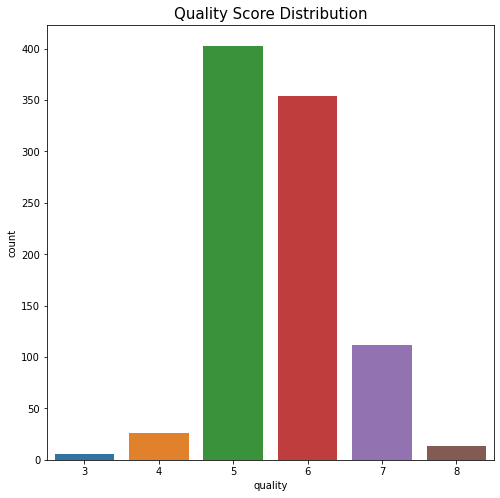

In [7]:
colors = sns.color_palette('tab10')
plt.figure(figsize=(8, 8))
plt.title('Quality Score Distribution', fontsize=15)
sns.countplot(x=df_train['quality'], palette=colors)

The distribution of the quality scores basically show that, our scores are mostly around 5-6. Also we can see that there are more than 100 different wines with a score of 7. On the other hand we have less than 25 wines with the scores 3,4 and 8 and no wines with 0,1,2,9 and 10.

<AxesSubplot:>

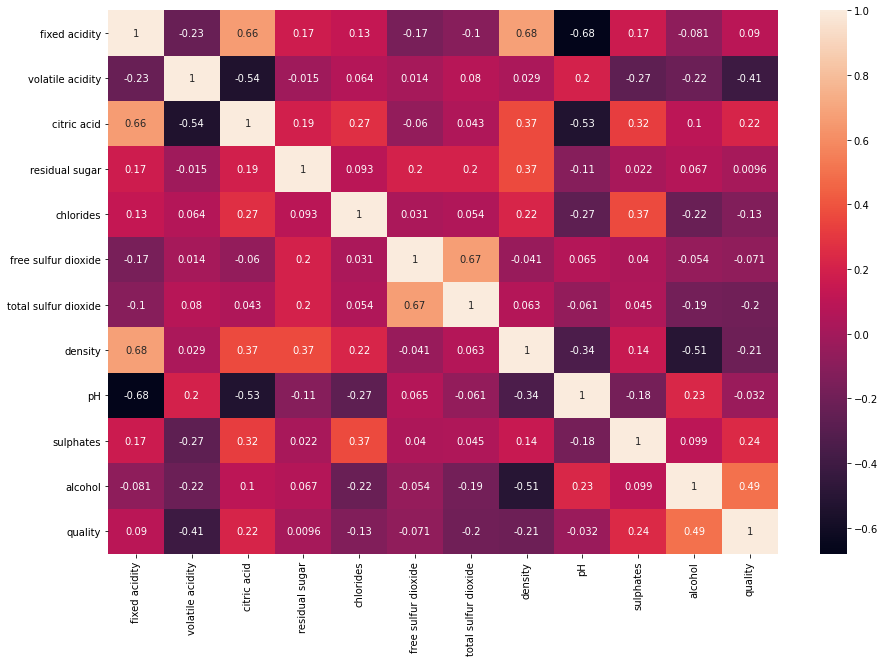

In [8]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_train.corr(), annot=True)

In the correlation map, we can see that quality score is mostly and positively effected by the alcohol level. Then fixed acidity, citric acid and sulphates are following alcohol level. On the other hand we can see that volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density and pH is negatively correlated with the quality score. 

## Checking null values and non-logical values
We already know that we have 914 data points for each column and in previous table we have seen for each column there is exactly 914 non-null values. This shows us that our table does not contain any null values. But in any case, we want to keep this step in our pipeline. Also we want to check if there are any values which are not logical. This is a cross-check step for describe() method we used before.

In [9]:
df_train.isnull().sum()

for x in df_train:
  print(df_train[x].unique())

[ 7.2  8.8  8.   8.1  7.5  9.9  7.9  5.8  8.6  9.1  7.8  7.1  7.7  6.6
  8.9  8.4 14.3  6.1  8.3  9.5 10.2 10.9  6.5  7.4  8.2  6.8 10.8 12.
  9.2 11.4  9.7  6.3  6.4  6.  11.2  8.5  9.3  5.3 10.7 11.1 10.3  7.6
 10.   8.7  5.   6.2 11.3 11.9  9.   5.9  9.8  9.6 10.6 13.   7.   7.3
  6.9  6.7 12.8 13.4  5.6 11.6 11.5 15.   5.1 10.5 12.9  5.7 12.3 10.1
 12.7  4.9 10.4 11.7  5.4 12.5  4.6  9.4 15.6 15.5  5.2 12.6 12.4 13.7
 13.2 13.3 11.8 13.5 15.9]
[0.62  0.64  0.39  0.29  0.38  0.49  0.34  0.61  0.42  0.765 0.955 0.7
 0.43  0.58  0.32  0.52  0.735 0.5   0.81  0.59  0.66  0.12  0.57  0.65
 0.31  0.54  0.85  0.78  0.33  0.6   0.18  0.2   0.4   0.26  0.98  0.67
 0.715 0.37  0.47  0.35  0.45  0.48  0.565 1.04  0.725 0.53  0.36  0.28
 0.645 0.71  0.705 0.25  0.56  0.41  0.77  0.22  0.815 0.63  0.3   0.27
 0.72  0.46  0.76  1.02  0.415 0.91  0.84  0.74  0.935 0.69  0.915 0.21
 0.605 0.73  0.88  0.24  0.625 0.965 0.51  0.475 0.635 0.68  0.89  0.44
 0.785 0.615 0.795 0.75  0.745 0.655 0.55  0.

Our dataset is clean and does not have any null values. Since it does not need any further cleaning, we can start building our modules from this point.

# Feature Engineering

This is step can be considered as a preprocessing steps before we go to build our modules. Our main purpose here is to remove missing values, normalizing/standardizing our data, encoding categorical futures, handling the imbalanced classes and reducing the dimensionality of our train dataset. 

On the otherside, our dataset does all of these steps to be applied:\
-We do not need to remove missing values, our dataset is already clear and we do not have any missing values.\
-We do not have categorical futures, all of our futures are either float or integer.\
-We do not need to reduce the dimensonality of our dataset, since it is already a small dataset.

Considering the information above, the only steps that we are going to take in this stage is seperating the target label, balancing classes with oversampling and standardizing our data.

## Seperating Target Label
First of all, we are going to divide our datasets into x and y to seperate target label from the others where y will be our target label.

In [10]:
x_train = df_train.drop(['quality'], axis=1)
y_train = df_train['quality']
x_test = df_test.drop(['quality'], axis=1)
y_test = df_test['quality']

print(f'Training and Test Datasets are ready with the following dimensions:\n \
x_train: {x_train.shape}\n x_test: {x_test.shape}\n \
y_train: {y_train.shape}\n y_test: {y_test.shape}')

Training and Test Datasets are ready with the following dimensions:
 x_train: (914, 11)
 x_test: (229, 11)
 y_train: (914,)
 y_test: (229,)


## Oversampling the Data

We have seen that our dataset is imbalanced in the first steps. For a better prediction, we need to balance our dataset with similar data points. For this purpose we are going to use Random Over Sampler method from imbalanced learn library. We are going to take our train dataset and add new data points until our imbalanced classes are close to other classes. This value is determined as 350, so in the end we will have 350 samples for quality score of 3, 4, 7 and 8.

x_train: (2157, 11).


<AxesSubplot:title={'center':'Quality Score Distribution'}, xlabel='quality', ylabel='count'>

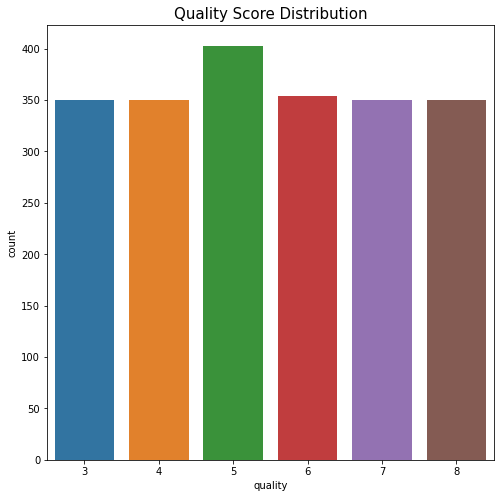

In [11]:
oversample = RandomOverSampler(sampling_strategy={3:350, 4:350, 7:350, 8:350})
x_train, y_train = oversample.fit_resample(x_train, y_train)

print(f'x_train: {x_train.shape}.')

colors = sns.color_palette('tab10')
plt.figure(figsize=(8, 8))
plt.title('Quality Score Distribution', fontsize=15)
sns.countplot(x=y_train, palette=colors)

After oversampling, now we have a balanced target dataset. We have 350 samples for quality score of 3, 4, 7 and 8 and a little more than that for 5 and 6. This will help us to get better prediction results.

## Standardizing the Data

We are going to use Standard Scaler to standardize our data. We are using this step to simply make sure that our data is internally consistent.

In [12]:
std = StandardScaler()

x_train = std.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = std.transform(x_test)
x_test = pd.DataFrame(x_test)

Now our datasets are ready for further steps. Our training set is clean and ready to train the models. 

# Model Selection, Tuning, Prediction and Testing

## Training with Different Algorithms

After completing the previous steps, our data is ready for training different classification models. In training part, we will be using different methods to reach the best result. 

Our predicted value will be the quality of wine. The values that Quality of Wine can be is between 0-10. In that case, we can simply see this problem as both discerete and continues. If we want to predict the quality with intervals like "4.50-5.49=5" we can use regression models. But we will approach this case as a classification problem. That's why in our further steps, we will use different classification algorithms from sklearn library. This algorithms will be:\
-KNN \
-SVM \
-DecisionTree \
-RandomForestClassifier

For each algorithm, we will tune our models using GridSearchCV() method. This method basically, takes a grid as an input and calculates the best score between given values trying one after another. 

After working with different algorithms, the results will be seen in terms of accuracy score. The algorithm with the highest score will be used for our prediction in the next stage.

### K-Nearest Neighbor Classifier

This algorithm classifies a given input according to the k neighbors which are closest. The value k is determined by n_neighbors hyperparameter. The hyperparameters which we are going to tune for K-Nearest Neighbor Classifier is as follows:\
__n_neighbors:__ Determining number of neighbors\
__weights:__ Selecting uniform or distance as the weight function of the prediction\
__metric:__ Choosing the distance metric for the tree

In [13]:
params_knn = {
    'n_neighbors': [int(x) for x in np.linspace(1, 250, num=40)],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

knn = GridSearchCV(KNeighborsClassifier(), param_grid=params_knn, scoring='accuracy', n_jobs=-1)
knn.fit(x_train, y_train)

print(f'The accuracy score for K-Nearest Neighbor Classifier is: {round(knn.best_score_, 2)}, \
with the best parameters: {knn.best_params_}.')

The accuracy score for K-Nearest Neighbor Classifier is: 0.87, with the best parameters: {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}.


### Support Vector Machine Classifier

In Support Vector Machine Classification, the algorithm creates hyperplanes to classify a given input. The important parameters that we are going to tune is as follows:\
__C:__ Selecting the regularization constant of the algortihm\
__kernel:__ Specifying the kernel type among 'linear', 'poly', 'rbf', 'sigmoid'\
__gamma:__ Determining the Kernel Coefficient

In [14]:
params_svc = {
    'C': [100, 10, 1, 0.1, 0.01],
    'kernel':  ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [1, 0.1, 0.01, 0.001]
}

svc = GridSearchCV(SVC(), param_grid=params_svc, scoring='accuracy', n_jobs=-1)
svc.fit(x_train, y_train)

print(f'The accuracy score for Support Vector Machines is: {round(svc.best_score_, 2)}, \
with the best parameters: {svc.best_params_}.')

The accuracy score for Support Vector Machines is: 0.88, with the best parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}.


### Decision Tree Classifier

This method creates us a decision tree with the given hyperparameters. This decision tree will create new nodes according to the training data. To tune our model we are going to change to following hyperparameters:\
__criterion:__ Determining the function to measure the quality of the splits\
__max_depth:__ Determining the maximum depth the tree can go\
__min_samples_split:__ Determining the minimum number of samples necessary to split a node\
__min_samples_leaf:__ Determining the minimum number of samples necessary to be a leaf

In [15]:
params_dtc = {
    'criterion': ['gini', 'entropy'],
    'max_depth':  [int(x) for x in np.linspace(1, 250, num=40)],
    'min_samples_split': range(2, 10, 2),
    'min_samples_leaf': range(2, 10, 2)
}

dtc = GridSearchCV(DecisionTreeClassifier(), param_grid=params_dtc, scoring='accuracy', n_jobs=-1)
dtc.fit(x_train, y_train)

print(f'The accuracy score for Decision Tree Classifier is: {round(dtc.best_score_, 2)}, \
with the best parameters: {dtc.best_params_}.')

The accuracy score for Decision Tree Classifier is: 0.84, with the best parameters: {'criterion': 'gini', 'max_depth': 109, 'min_samples_leaf': 2, 'min_samples_split': 4}.


### Random Forest Classifier

Random Forest Classifier, creates different decision trees to make the prediction. The algorithm has the following hyperparameters which are the most important ones:
    
__n_estimators:__ Determining the number of trees in the random forest\
__max_features:__ Determining the number of features in consideration at every split\
__max_depth:__ Determining the maximum depth the tree can go\
__min_samples_split:__ Determining the minimum number of samples necessary to split a node\
__min_samples_leaf:__ Determining the minimum number of samples necessary to be a leaf\
__bootstrap:__ Selecting method used to sample data points

In [16]:
params_rfc = {
    'n_estimators': [10, 25, 50, 100, 250],
    'max_depth': [int(x) for x in np.linspace(1, 250, num=40)],
    'min_samples_split': [2, 6, 10, 24],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

rfc = GridSearchCV(RandomForestClassifier(), param_grid=params_rfc, scoring='accuracy', n_jobs=-1)
rfc.fit(x_train,y_train)

print(f'The accuracy score for Random Forest Classifier is: {round(rfc.best_score_, 2)}, \
with the best parameters: {rfc.best_params_}.')

The accuracy score for Random Forest Classifier is: 0.89, with the best parameters: {'bootstrap': False, 'max_depth': 71, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25}.


According to our training and accuracy scores, all of our models has a score over 0.8. This score is enough to continue with the next step, predicting and testing. For this purpose, we will try our best two models which are Support Vector Machine Classifier and Random Forest Classifier with the acuracy scores 0.88 and 0.89 respectively. Although both K-Nearest Neighbor and Decision Tree Classifier has a score more than 0.8, other two models seems to be working better for our dataset.

## Predicting and Testing with Best Models

In this last phase of our pipeline, we are going to test our best two models with a prediction. Our prediction models are also ready with the best hyperparameters and trained with the train data. Now we are going to use the two of our best models to make predictions and compare it with our target label. In the test step we are going to use accuracy score, classification report(where information like precision, recall, f1-score and support is analyzed) and confusion matrix. According to our results, we are going to select our best model for wine quality prediction task.

### Random Forest Classifier

The accuracy score of Random Forest Classifier is: 0.69.
The classification report for Random Forest Classifier is: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         7
           5       0.68      0.81      0.74        80
           6       0.73      0.68      0.70       108
           7       0.65      0.65      0.65        31
           8       0.50      0.33      0.40         3

    accuracy                           0.69       229
   macro avg       0.43      0.41      0.41       229
weighted avg       0.68      0.69      0.68       229



<AxesSubplot:>

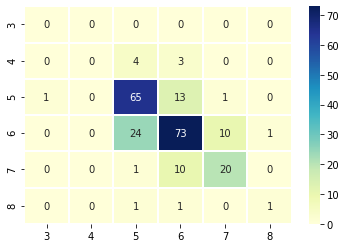

In [19]:
y_rfc = rfc.predict(x_test)

accuracy = accuracy_score(y_test, y_rfc)
cm_rfc = confusion_matrix(y_test, y_rfc)

print(f'The accuracy score of Random Forest Classifier is: {round(accuracy, 2)}.')
print(f'The classification report for Random Forest Classifier is: \n \
{classification_report(y_test, y_rfc)}')
sns.heatmap(cm_rfc, annot=True, cmap='YlGnBu', linewidths=0.3, xticklabels=[3, 4, 5, 6, 7, 8], yticklabels=[3, 4, 5, 6, 7, 8])

### Support Vector Machine Classifier

The accuracy score of Support Vector Machine Classifier is: 0.65.
The classification report for Support Vector Machine Classifier is: 
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         7
           5       0.57      0.76      0.65        80
           6       0.70      0.64      0.67       108
           7       0.82      0.58      0.68        31
           8       0.50      0.33      0.40         3

    accuracy                           0.65       229
   macro avg       0.52      0.46      0.48       229
weighted avg       0.65      0.65      0.64       229



<AxesSubplot:>

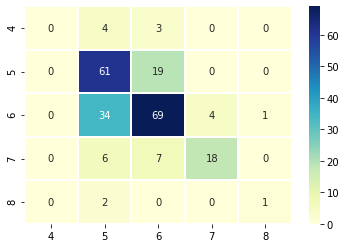

In [18]:
y_svc = svc.predict(x_test)

accuracy = accuracy_score(y_test, y_svc)
cm_svc = confusion_matrix(y_test, y_svc)

print(f'The accuracy score of Support Vector Machine Classifier is: {round(accuracy, 2)}.')
print(f'The classification report for Support Vector Machine Classifier is: \n {classification_report(y_test, y_svc)}')
sns.heatmap(cm_svc, annot=True, cmap='YlGnBu', linewidths=0.3, xticklabels=[4, 5, 6, 7, 8], yticklabels=[4, 5, 6, 7, 8])

Although accuracy scores were really close to each other of this algorithms at the training stage, we can see that there is a 4% difference after prediction. This shows us our best model is Random Forest Classifier with a 0.69 accuracy score at the prediction stage. 

Our prediction score is lower than training scores, this is mainly because we have artificial values in the training our training score is high. 

The classification report shows us our best prediction is with the quality score of 5. Than 7 and 6 is following it respectively. And f1 score is the harmonic mean of precision and recall. So we can see that, again the quality score of 5 has the best f1 score. Last but not least, in the confusion matrix we can see the predicted and real scores. This matrix shows us that we have 8 bad predictions, which are 2 score points away from the actual one and 1 really bad prediction which is 3 points away. But on the other hand, other mistakes are more tolerable since they are close to the target. 

# Discussion and Conclusion

In our Wine Quality Score prediction task, we started with our project with a dataset which gives us information about the wines produced in the Vinho Verde region. In the first steps, we have overviewed our data and get knowledge about all attributes and target sets. After this, cleaning and getting the dataset ready for training our models. We have trained our classification models and got accuracy scores to compare which ones fit better for our dataset. As the last part, we had the prediction scores for our best models, where Random Forest Classifier had the best score.

Our prediction task of Wine Quality Score with the given dataset about "Vinho Verde" wines ends up with a 0.69 accuracy score. Although this is not a score which is good enough, since our dataset is small this is the best score that we can reach with classification methods. Our model can give better results with more datapoints. Also other methods of machine learning can be applied for further analysis. The methods which can be useful are as follows: Clustering, neural networks, etc. Also feature selection can be considered. 

As conclusion, we can say that our prediction model will improve with a bigger dataset, which will give us better predictions in the end. But with the dataset we have, gives us a chance to predict Wine Quality Score with an accuracy score of 0.69 using Random Forest Classifier.